In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, recall_score, auc, precision_score, roc_auc_score, f1_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sentence_transformers import SentenceTransformer

In [3]:
final = pd.read_excel('bert_dataset.xlsx')

In [4]:
final.drop(columns = ['Unnamed: 0', 'embeddings', 'code_tokens',"tokens_ids" ], inplace=True)

In [11]:
final.head()

,CWE-ID,code,label,CWE_Numerical
0,CWE-129,public void goodG2BSink(LinkedList<Integer> da...,1,0
1,CWE-113,"public void bad(HttpServletRequest request, Ht...",0,1
2,CWE-369,private void badSink(float data ) throws Throw...,0,2
3,CWE-190,public void goodB2GSink(long data ) throws Thr...,1,3
4,CWE-129,public void goodB2GSink(CWE129_Improper_Valida...,1,0


In [6]:
final['label'] = final['label'].map({'good': 1, 'bad': 0}).astype(int)

In [7]:
final_cwe = final.copy(deep=True)

In [8]:
final_cwe['CWE-ID'] = pd.factorize(final_cwe['CWE-ID'])[0]
final_cwe = final_cwe.rename(columns={'CWE-ID': 'CWE_Numerical'})

In [9]:
extracted_col = final_cwe["CWE_Numerical"]
final = final.join(extracted_col)

In [12]:
final.head()

,CWE-ID,code,label,CWE_Numerical
0,CWE-129,public void goodG2BSink(LinkedList<Integer> da...,1,0
1,CWE-113,"public void bad(HttpServletRequest request, Ht...",0,1
2,CWE-369,private void badSink(float data ) throws Throw...,0,2
3,CWE-190,public void goodB2GSink(long data ) throws Thr...,1,3
4,CWE-129,public void goodB2GSink(CWE129_Improper_Valida...,1,0


In [13]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [14]:
code_list = final["code"].values.tolist()

In [15]:
embeddings = embedder.encode(code_list)

In [16]:
embeddings_list = embeddings.tolist()

In [17]:
final['Embeddings'] = embeddings_list

In [173]:
final['label'].value_counts()

1    10154
0     4769
Name: label, dtype: int64

In [176]:
len(final['CWE-ID'].value_counts())

52

In [178]:
final['CWE-ID'].value_counts()

CWE-190    2889
CWE-191    2325
CWE-129    1679
CWE-369    1124
CWE-113     839
CWE-789     767
CWE-400     727
CWE-197     598
CWE-89      460
CWE-134     425
CWE-80      310
CWE-606     277
CWE-78      230
CWE-690     226
CWE-470     205
CWE-83      175
CWE-476     158
CWE-319     150
CWE-81      150
CWE-15      146
CWE-601     135
CWE-563     109
CWE-643      86
CWE-36       85
CWE-23       77
CWE-90       65
CWE-259      50
CWE-398      48
CWE-546      39
CWE-315      31
CWE-477      30
CWE-511      25
CWE-328      24
CWE-321      21
CWE-193      19
CWE-338      19
CWE-526      18
CWE-506      17
CWE-325      16
CWE-396      16
CWE-327      13
CWE-382      13
CWE-256      12
CWE-209      12
CWE-760      11
CWE-483      11
CWE-482      11
CWE-395      10
CWE-614      10
CWE-114      10
CWE-539      10
CWE-329      10
Name: CWE-ID, dtype: int64

In [19]:
final.to_excel("embeddings_SBERT.xlsx")

In [20]:
final_df = pd.read_excel("embeddings_SBERT.xlsx")

# Predicting CWE Categories

In [44]:
X_train, X_test, y_train, y_test = train_test_split(final.Embeddings.tolist(),final.CWE_Numerical, test_size=0.2, random_state=42)

In [142]:
def check_performance(classifier, X_train, y_train, X_test, results, idx):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:,1]
    # Metrics
    results.iloc[0, idx] = accuracy_score(y_test, y_pred)
    results.iloc[1, idx] = precision_score(y_test, y_pred,average='macro')
    results.iloc[2, idx] = recall_score(y_test, y_pred,average='macro')
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ",precision_score(y_test, y_pred,average='macro'))
    print("Recall Score: ",recall_score(y_test, y_pred,average='macro'))

In [143]:
results = pd.DataFrame(columns = ['DT','RF','NB', 'KNN'], index = range(3))
# DT --> Decision Tree
# RF --> Random Forest
# NB --> Naive Bayes 
# KNN --> K Nearest Neighbors

In [144]:
check_performance(DecisionTreeClassifier(), X_train, y_train, X_test, results, 0)

Accuracy:  0.7778894472361809
Precision Score:  0.6788156312411338
Recall Score:  0.5977226525699141


/home/varshaponnaganti/.conda/envs/cyber/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/varshaponnaganti/.conda/envs/cyber/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
check_performance(RandomForestClassifier(), X_train, y_train, X_test, results, 1)

Accuracy:  0.911892797319933
Precision Score:  0.9301242557333789
Recall Score:  0.907480544145312


In [146]:
check_performance(GaussianNB(), X_train, y_train, X_test, results, 2)

Accuracy:  0.7715242881072026
Precision Score:  0.8591184013792074
Recall Score:  0.863226859353272


In [147]:
check_performance(KNeighborsClassifier(), X_train, y_train, X_test, results, 3)

Accuracy:  0.8445561139028476
Precision Score:  0.9065075881689599
Recall Score:  0.8877474053191884


In [148]:
results

,DT,RF,NB,KNN
0,0.777889,0.911893,0.771524,0.844556
1,0.678816,0.930124,0.859118,0.906508
2,0.597723,0.907481,0.863227,0.887747


In [169]:
results.to_excel('sbert_cwe_outputs.xlsx')

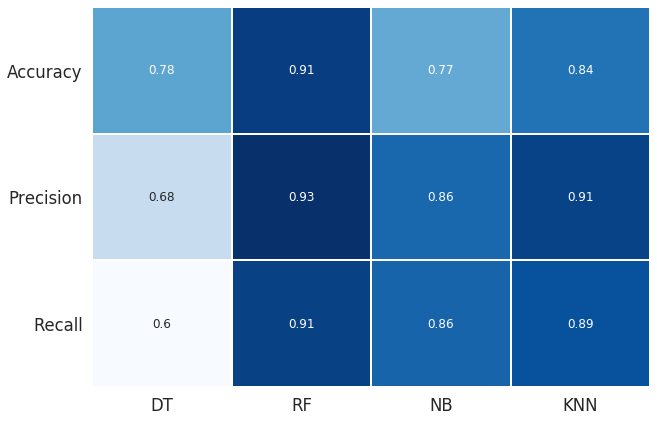

In [149]:
plt.figure(figsize = (10, 7))
sns.heatmap(results[results.columns.to_list()].astype(float), cmap = 'Blues', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['Accuracy', 'Precision', 'Recall'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()

# Predicting Good and Bad Code

In [156]:
def check_performance_l(classifier_l, X_train_l, y_train_l, X_test_l, results_badGood, idx_l):
    classifier_l.fit(X_train_l, y_train_l)
    y_pred_l = classifier_l.predict(X_test_l)
    y_prob_l = classifier_l.predict_proba(X_test_l)[:,1]
    # Metrics
    results_badGood.iloc[0, idx_l] = accuracy_score(y_test_l, y_pred_l)
    results_badGood.iloc[1, idx_l] = round(precision_score(y_test_l, y_pred_l), 2)
    results_badGood.iloc[2, idx_l] = round(recall_score(y_test_l, y_pred_l), 2)
    results_badGood.iloc[3, idx_l] = round(roc_auc_score(y_test_l, y_prob_l), 3)

    print(classification_report(y_test_l, y_pred_l))
    print("Accuracy: ", accuracy_score(y_test_l, y_pred_l))
    print("Precision Score: ",precision_score(y_test_l, y_pred_l, 2))
    print("Recall Score: ",recall_score(y_test_l, y_pred_l, 2))
    print(f'ROC AUC score: {round(roc_auc_score(y_test_l, y_prob_l), 3)}')
    print('')
    print('-----------------------------------------------------')

    # Roc curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_l, y_prob_l)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    sns.set(style = 'white')
    plt.figure(figsize = (8, 8))
    plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [151]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(final.Embeddings.tolist(),final.label, test_size=0.2, random_state=42)

In [161]:
results_badGood = pd.DataFrame(columns = ['NV','DT','KNN'], index = range(4))
# DT --> Decision Tree
# RF --> Random Forest
# NB --> Naive Bayes 
# KNN --> K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       923
           1       1.00      0.97      0.98      2062

    accuracy                           0.98      2985
   macro avg       0.96      0.98      0.97      2985
weighted avg       0.98      0.98      0.98      2985

Accuracy:  0.976214405360134
Precision Score:  1.0
Recall Score:  0.9655674102812803
ROC AUC score: 0.999

-----------------------------------------------------


/home/varshaponnaganti/.conda/envs/cyber/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/varshaponnaganti/.conda/envs/cyber/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


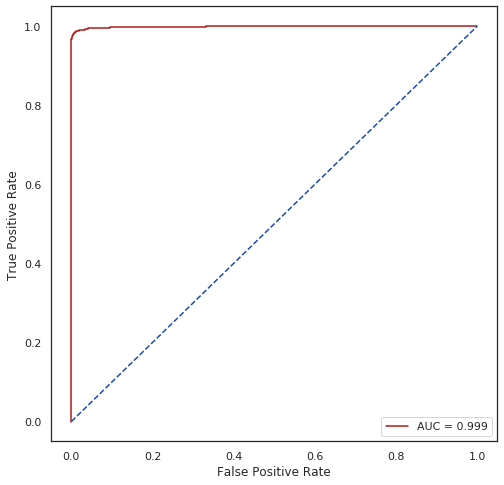

In [162]:
check_performance_l(GaussianNB(), X_train_l, y_train_l, X_test_l, results_badGood, 0)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       923
           1       0.99      0.99      0.99      2062

    accuracy                           0.99      2985
   macro avg       0.98      0.98      0.98      2985
weighted avg       0.99      0.99      0.99      2985

Accuracy:  0.9862646566164154
Precision Score:  0.9912493923189111
Recall Score:  0.9888457807953444
ROC AUC score: 0.985

-----------------------------------------------------


/home/varshaponnaganti/.conda/envs/cyber/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/varshaponnaganti/.conda/envs/cyber/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


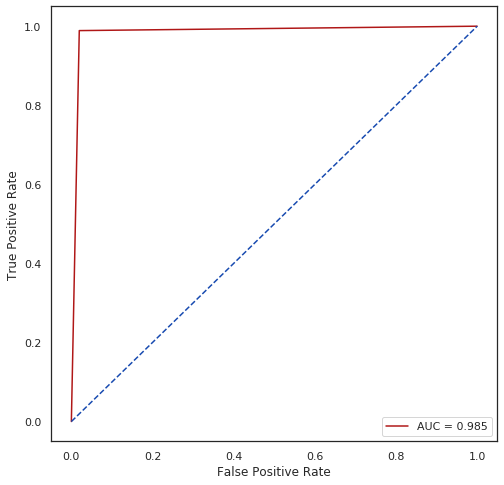

In [163]:
check_performance_l(DecisionTreeClassifier(), X_train_l, y_train_l, X_test_l, results_badGood, 1)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       923
           1       0.99      0.99      0.99      2062

    accuracy                           0.99      2985
   macro avg       0.99      0.99      0.99      2985
weighted avg       0.99      0.99      0.99      2985

Accuracy:  0.9902847571189279
Precision Score:  0.9917755200774069
Recall Score:  0.9941804073714839
ROC AUC score: 1.0

-----------------------------------------------------


/home/varshaponnaganti/.conda/envs/cyber/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/varshaponnaganti/.conda/envs/cyber/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


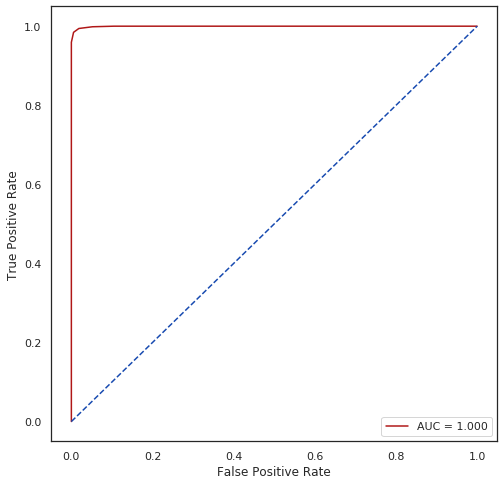

In [164]:
check_performance_l(KNeighborsClassifier(), X_train_l, y_train_l, X_test_l, results_badGood, 2)

In [168]:
results_badGood.to_excel('sbert_badgood_outputs.xlsx')

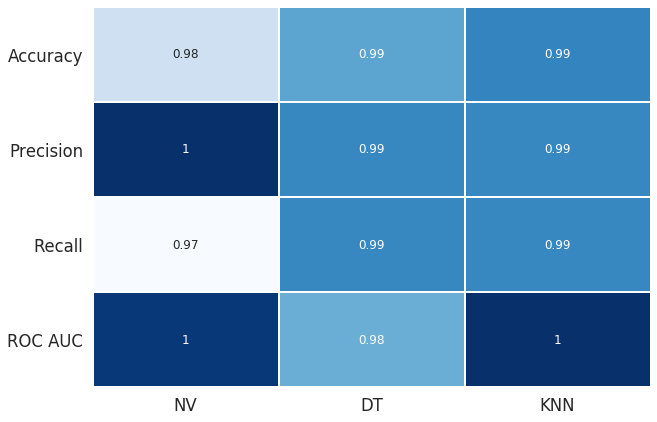

In [167]:
plt.figure(figsize = (10, 7))
sns.heatmap(results_badGood[results_badGood.columns.to_list()].astype(float), cmap = 'Blues', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['Accuracy', 'Precision', 'Recall','ROC AUC'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()